In [1]:
import pandas as pd
df=pd.read_csv('ba.csv',sep=';')

In [2]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
import numpy as np
df['y']=np.where(df['y']=='yes',1,0)
df['y']=df['y'].astype('str')

In [4]:
col_list=list(df.columns)

In [5]:
df['age']=df['age'].fillna(df['age'].median())

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df.isnull().sum()


age               0
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 0
dtype: int64

In [8]:
# dmo1=['age','duration']
# for i in dmo1:
#     plt.figure()
#     plt.boxplot(df[i])
#     plt.show()

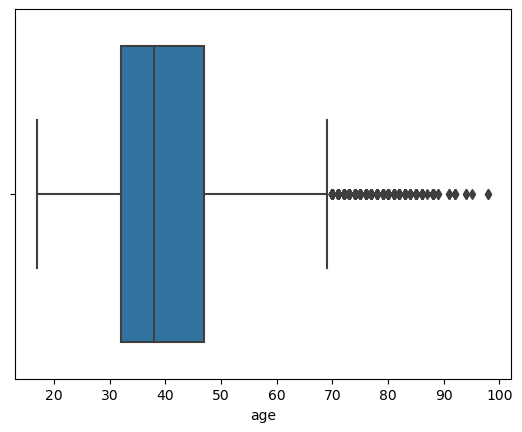

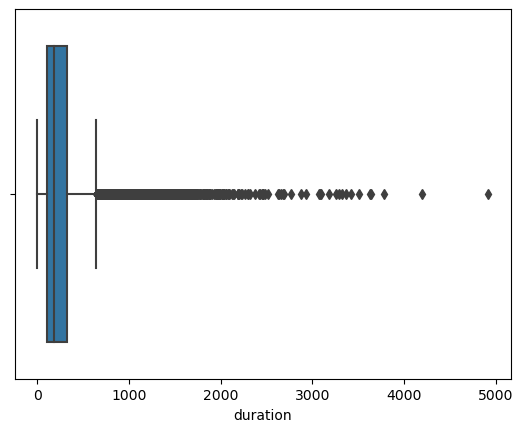

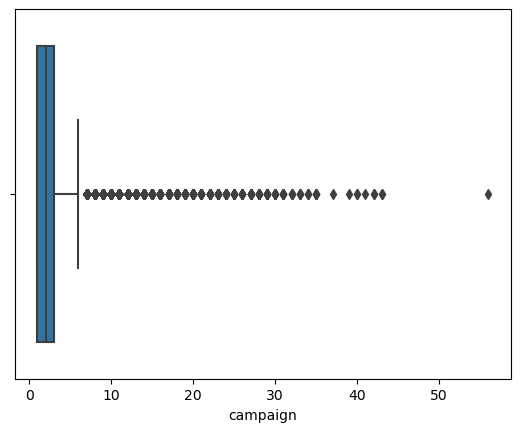

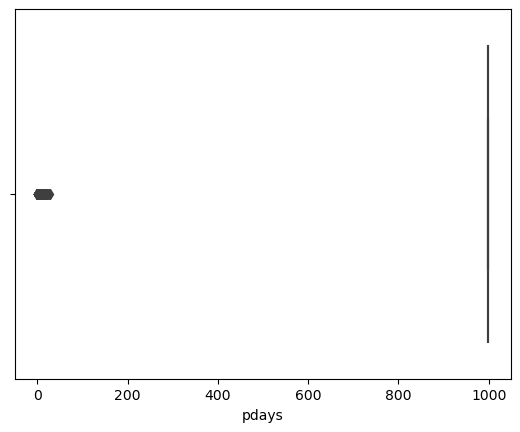

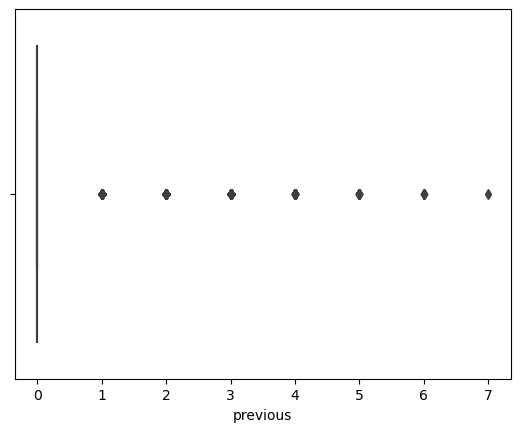

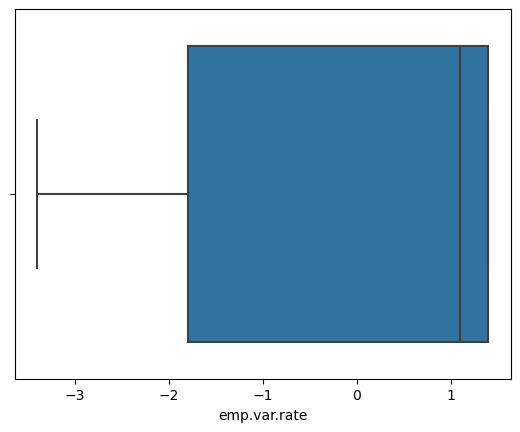

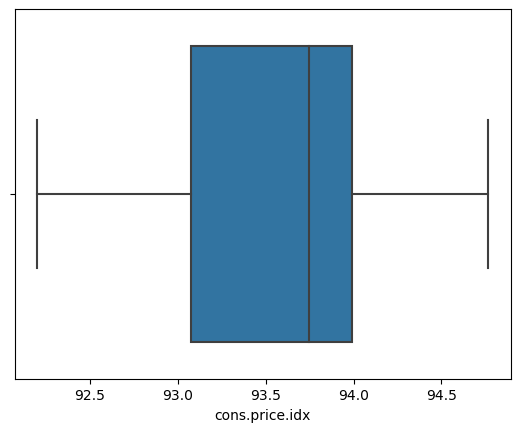

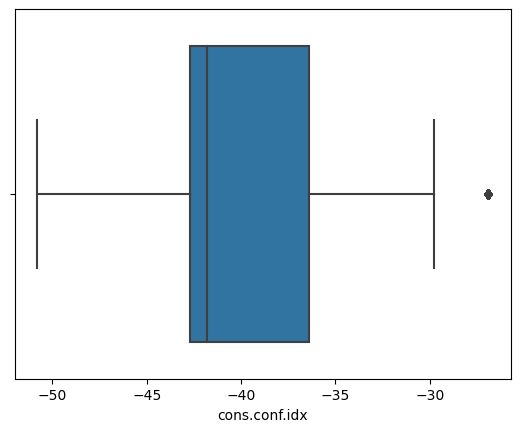

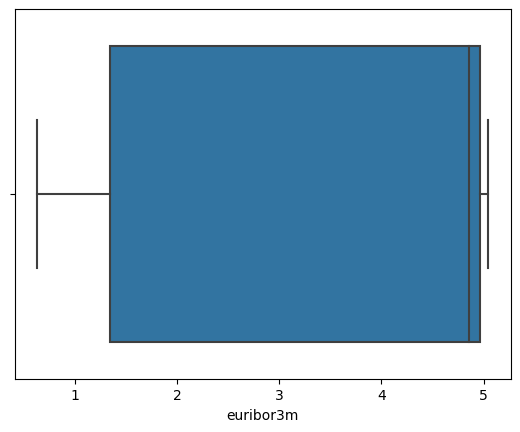

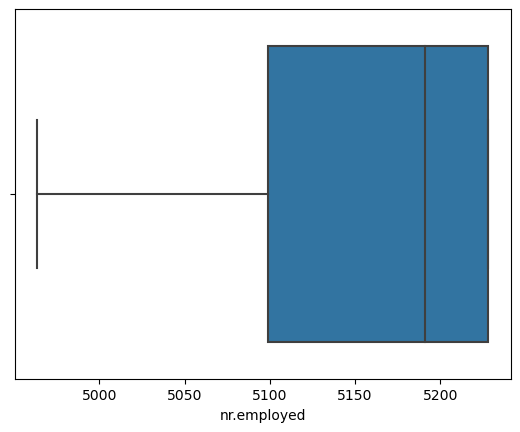

In [9]:
import seaborn as sns
for i in col_list:
    if df[i].dtype!='object':
        plt.figure()
        sns.boxplot(x=df[i])
     

#     iqr=q3-q1
#     min1=q1-1.5*iqr
#     max1=q3+1.5*iqr
#     df=df[(df[i]>min1)&(df[i]<max1)]

In [10]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
iqr=Q3-Q1

#print(Q1,Q3)

C:\Users\hp\AppData\Local\Temp\ipykernel_21252\2134976733.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=df.quantile(0.25)
C:\Users\hp\AppData\Local\Temp\ipykernel_21252\2134976733.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=df.quantile(0.75)


In [11]:
df=df[~((df>(Q3+1.5*iqr)) |(df<(Q1-1.5*iqr))).any(axis=1)]

C:\Users\hp\AppData\Local\Temp\ipykernel_21252\1712259411.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df>(Q3+1.5*iqr)) |(df<(Q1-1.5*iqr))).any(axis=1)]


In [12]:
df.shape

(30363, 21)

In [13]:
collist=list(df.columns)
collist.remove('y')

In [14]:
for i in collist:
    if df[i].dtype=='object':
        df[i]=df[i].fillna(df[i].mode()[0])
    else:
        df[i]=df[i].fillna(df[i].mean())
        

In [15]:
df['age'].max()

69.0

In [16]:
bins=[10,25,45,70]

In [17]:
df['age']=pd.cut(df['age'],bins)

In [18]:
df['age']=df['age'].astype('str')

In [19]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"(45, 70]",housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,"(45, 70]",services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,"(25, 45]",services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,"(25, 45]",admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,"(45, 70]",services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [20]:
    df['age'].unique()

array(['(45, 70]', '(25, 45]', '(10, 25]'], dtype=object)

In [21]:
col_list=[]
for col in df.columns:
    if((df[col].dtype=='object') & (col!='y')):
        col_list.append(col)

In [22]:
print(col_list)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in col_list:
    df[i]= le.fit_transform(df[i])

In [24]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,2,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,2,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,1,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,1,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,2,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
co_list=[]
for i in df.columns:
    if i!='y':
        co_list.append(i)
        

In [27]:
X=df[co_list]

In [28]:
vif_data=pd.DataFrame()

In [29]:
vif_data['features']=X.columns

In [30]:
vif_data['vis']=[ variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [31]:
vif_data

,features,vis
0,age,1.145521
1,job,1.025433
2,marital,1.121790
3,education,1.100115
4,default,1.099894
5,housing,1.013130
6,loan,1.003013
7,contact,2.718225
8,month,2.059901
9,day_of_week,1.010956


In [32]:
df=df.drop('pdays',axis=1)

In [33]:
co_list=[]
for i in df.columns:
    if i!='y':
        co_list.append(i)
X=df[co_list]        
vif_data=pd.DataFrame()       
        

In [34]:
vif_data['features']=X.columns

In [35]:
vif_data['vis']=[ variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [36]:
vif_data

,features,vis
0,age,8.030364
1,job,2.095120
2,marital,5.324066
3,education,4.463989
4,default,1.420825
5,housing,2.192927
6,loan,1.208233
7,contact,3.589167
8,month,7.819039
9,day_of_week,3.106403


In [37]:
df=df.drop('nr.employed',axis=1)
co_list=[]
for i in df.columns:
    if i!='y':
        co_list.append(i)
X=df[co_list]        
vif_data=pd.DataFrame()   
vif_data['features']=X.columns
vif_data['vis']=[ variance_inflation_factor(X.values,i) for i in range(len(X.columns))]


        

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [38]:
df=df.drop('cons.price.idx',axis=1)
co_list=[]
for i in df.columns:
    if i!='y':
        co_list.append(i)
        
X=df[col_list]
vif_data=pd.DataFrame()
vif_data['features']=X.columns
vif_data['vis']=[ variance_inflation_factor(X.values,i) for i in range(len(X.columns))]



C:\Users\hp\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [39]:
df=df.drop('poutcome',axis=1)
co_list=[]
for i in df.columns:
    if i!='y':
        co_list.append(i)
X=df[co_list]
vif_data=pd.DataFrame()
vif_data['features']=X.columns
vif_data['vis']=[ variance_inflation_factor(X.values,i) for i in range(len(X.columns))]


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [40]:
vif_data

,features,vis
0,age,7.758284
1,job,2.085678
2,marital,5.188857
3,education,4.386714
4,default,1.417659
5,housing,2.187403
6,loan,1.207481
7,contact,2.504275
8,month,6.424292
9,day_of_week,3.082716


In [41]:
df=df.drop('euribor3m',axis=1)
co_list=[]
for i in df.columns:
    if i!='y':
        co_list.append(i)
X=df[co_list]
vif_data=pd.DataFrame()
vif_data['features']=X.columns
vif_data['vis']=[ variance_inflation_factor(X.values,i) for i in range(len(X.columns))]


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [42]:
vif_data

,features,vis
0,age,7.163341
1,job,2.074244
2,marital,5.062908
3,education,4.188610
4,default,1.417654
5,housing,2.176891
6,loan,1.207199
7,contact,2.494230
8,month,5.780584
9,day_of_week,3.034306


In [43]:
df=df.drop('cons.conf.idx',axis=1)
co_list=[]
for i in df.columns:
    if i!='y':
        co_list.append(i)
X=df[co_list]
vif_data=pd.DataFrame()
vif_data['features']=X.columns
vif_data['vis']=[ variance_inflation_factor(X.values,i) for i in range(len(X.columns))]


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [44]:
vif_data

,features,vis
0,age,5.404310
1,job,2.045509
2,marital,4.115206
3,education,3.917344
4,default,1.410015
5,housing,2.108760
6,loan,1.202027
7,contact,2.482384
8,month,5.118107
9,day_of_week,2.892901


In [45]:
df=df.drop('previous',axis=1)
co_list=[]
for i in df.columns:
    if i!='y':
        co_list.append(i)
X=df[co_list]
vif_data=pd.DataFrame()
vif_data['features']=X.columns
vif_data['vis']=[ variance_inflation_factor(X.values,i) for i in range(len(X.columns))]


In [46]:
vif_data

,features,vis
0,age,5.404310
1,job,2.045509
2,marital,4.115206
3,education,3.917344
4,default,1.410015
5,housing,2.108760
6,loan,1.202027
7,contact,2.482384
8,month,5.118107
9,day_of_week,2.892901


In [47]:
ind_feature=list(vif_data.features)

In [48]:
ind_feature

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'emp.var.rate']

In [49]:
df_new = df[ind_feature]

In [50]:
df_new

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,emp.var.rate
0,2,3,1,0,0,0,0,1,6,1,261.000000,1.000000,1.100000
1,2,7,1,3,1,0,0,1,6,1,149.000000,1.000000,1.100000
2,1,7,1,3,0,2,0,1,6,1,226.000000,1.000000,1.100000
3,1,0,1,1,0,0,0,1,6,1,151.000000,1.000000,1.100000
4,2,7,1,3,0,0,2,1,6,1,307.000000,1.000000,1.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41185,2,5,1,6,0,2,0,0,7,0,189.000000,2.000000,-1.100000
41186,1,9,1,5,0,0,0,0,7,0,442.000000,1.000000,-1.100000
41188,1,0,1,6,0,2,0,0,6,1,204.932576,2.081555,0.388261
41191,1,0,1,6,0,2,0,0,6,1,204.932576,2.081555,0.388261


In [51]:
df_dep=df['y']

In [52]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df_new,df_dep,test_size=0.25,random_state=100)

In [53]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()



In [54]:
logreg.fit(xtrain,ytrain)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
test_pred=logreg.predict(xtest)

In [56]:
test_pred

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [57]:
pd.DataFrame(logreg.predict_proba(xtest))

,0,1
0,0.834316,0.165684
1,0.994024,0.005976
2,0.944885,0.055115
3,0.997260,0.002740
4,0.993418,0.006582
...,...,...
7586,0.993235,0.006765
7587,0.820541,0.179459
7588,0.999018,0.000982
7589,0.992814,0.007186


In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score
c1=confusion_matrix(ytest,test_pred)

In [59]:
c1

array([[7117,   93],
       [ 314,   67]], dtype=int64)

In [78]:
recall=67/(67+314)

In [79]:
recall

0.17585301837270342

In [68]:
pr=67/(67+314

In [69]:
pr

0.17585301837270342

In [65]:
from sklearn.metrics import classification_report
print(classification_report(ytest,test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7210
           1       0.42      0.18      0.25       381

    accuracy                           0.95      7591
   macro avg       0.69      0.58      0.61      7591
weighted avg       0.93      0.95      0.94      7591



In [80]:
#precision=tp/tp+fp
#recall = sensitivity=tp/tp+fn
#specificity=tn/tn+fp

In [84]:
i=2*0.96*0.99
print(i)

1.9007999999999998


In [85]:
1.9/(0.96+0.99)

0.9743589743589743

In [86]:
0.17+0.43/(2)

0.385